In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
from scipy import stats
import math
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/real_estate.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_date                     414 non-null    float64
 1   house_age                            414 non-null    int64  
 2   distance_to_the_nearest_MRT_station  414 non-null    float64
 3   number_of_convenience_stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house_price_of_unit_area             414 non-null    float64
 7   house_age_square                     414 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


In [6]:
df.columns

Index(['transaction_date', 'house_age', 'distance_to_the_nearest_MRT_station',
       'number_of_convenience_stores', 'latitude', 'longitude',
       'house_price_of_unit_area', 'house_age_square'],
      dtype='object')

In [7]:
# for convenience, I rename to shorten attributes's name
df.columns = ['transaction_date', 'house_age', 'distance',
       'number_stores', 'latitude', 'longitude',
       'house_price', 'house_age_square']

In [8]:
"""
Dataset includes 8 attributes, non-null values:
continuous attributes : transaction_date, distance_to_the_nearest_MRT_station, latitude, longitude, house_price_of_unit_area
categorical attribites: house_age, number_of_convenience_stores, house_age_square ( = house_age * house_age)
"""
continuous = ["transaction_date", "distance", "latitude", "longitude", "house_price"]
categorical = ["house_age", "number_stores", "house_age_square"]

In [9]:
df.describe()

,transaction_date,house_age,distance,number_stores,latitude,longitude,house_price,house_age_square
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.292271,1083.885689,4.094203,24.969030,121.533361,37.980193,427.166667
std,0.281967,11.333769,1262.109595,2.945562,0.012410,0.015347,13.606488,459.166535
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,0.000000
25%,2012.917000,9.000000,289.324800,1.000000,24.963000,121.528085,27.700000,81.000000
50%,2013.167000,16.000000,492.231300,4.000000,24.971100,121.538630,38.450000,256.000000
75%,2013.417000,28.000000,1454.279000,6.000000,24.977455,121.543305,46.600000,784.000000
max,2013.583000,43.000000,6488.021000,10.000000,25.014590,121.566270,117.500000,1849.000000


In [10]:
def function_to_pair_plot(df):
    plt.figure(dpi=120)
    sns.pairplot(df)
    plt.show()

<Figure size 720x480 with 0 Axes>

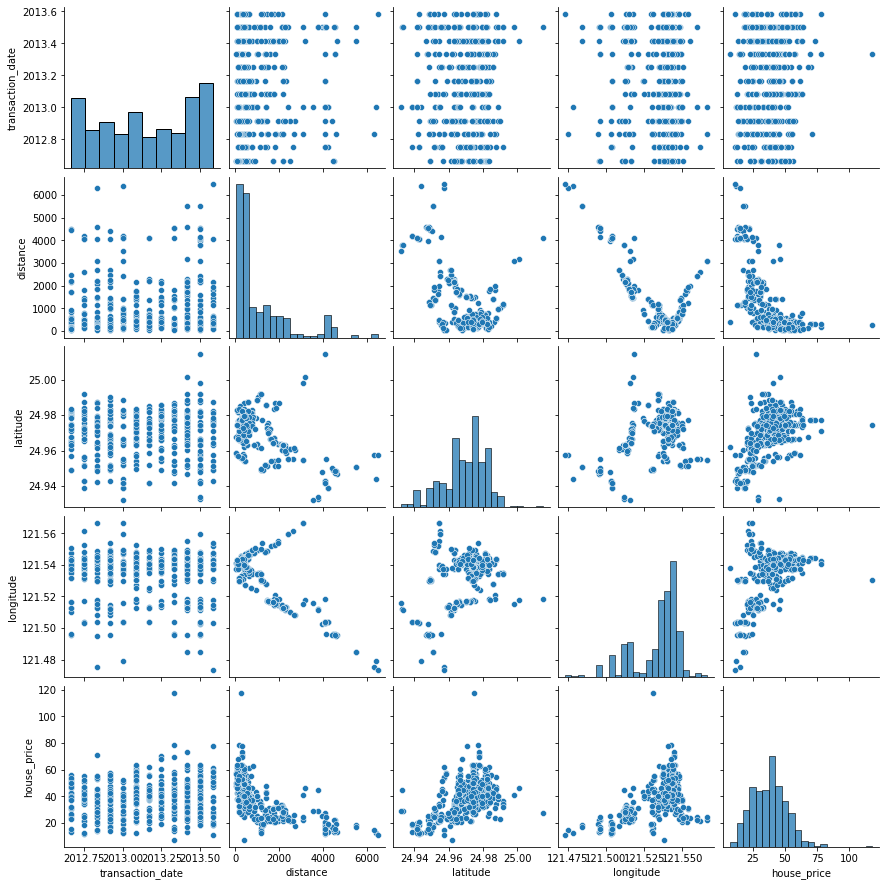

In [11]:
# pair-plot attributes from continuous set to see how correlated each pair of them is
function_to_pair_plot(df[continuous])

In [12]:
"""
The cross line of chart above is histogram of each attributes. 
- house_price and latitude are likely normal distributions
- house_price is slightly skew at the right side
- latitude is likely skew at the left side

"""

'\nThe cross line of chart above is histogram of each attributes. \n- house_price_of_unit_area and latitude are likely normal distributions\n'

In [13]:
def function_to_pair_plot_kde(df):
    plt.figure(dpi=120)
    sns.pairplot(df, diag_kind="kde")
    plt.show()

<Figure size 720x480 with 0 Axes>

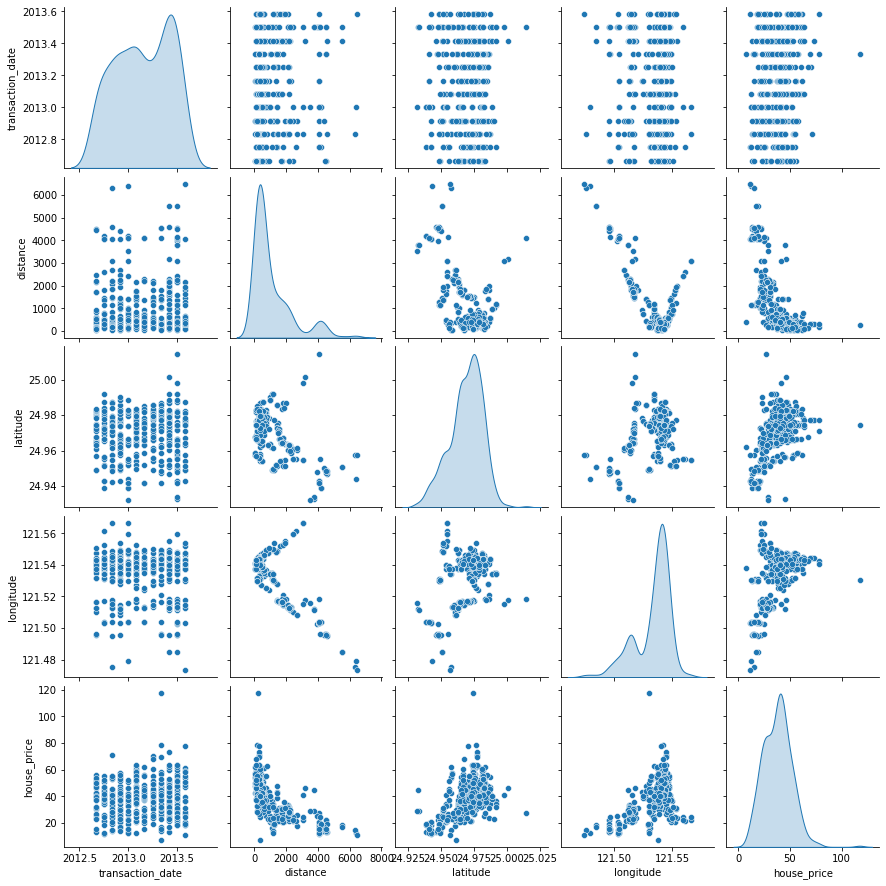

In [14]:
"""
We might want to see the KDE of them:
"""
function_to_pair_plot_kde(df[continuous])

In [15]:
def plot_heatmap(df):
    plt.figure(dpi = 120,figsize= (5,4))
    mask = np.triu(np.ones_like(df.corr(),dtype = bool))
    sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
    plt.yticks(rotation = 0)
    plt.xticks(rotation = 90)
    plt.title('Correlation Heatmap')
    plt.show()

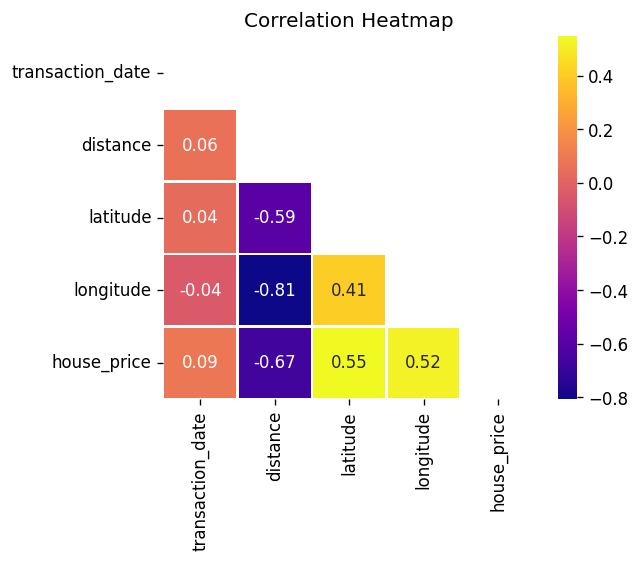

'\nPlot Correlation Heatmap to find out the exact correlation metrics\nThere are obviously some extreme correlations here. For instance, distance is negatively correlated with the rest (-0.59, -0.81, -0.67) except transaction_date.\nhouse_price is the same as distance\ntransaction_date is likely not correlated with the rest.\n\n'

In [16]:
plot_heatmap(df[continuous])
"""
Plot Correlation Heatmap to find out the exact correlation metrics
There are obviously some extreme correlations here. For instance, distance is negatively correlated with the rest (-0.59, -0.81, -0.67) except transaction_date.
house_price is the same as distance
transaction_date is likely not correlated with the rest.

"""

Distance with other continuous variables 

Correlation between Distance and transaction_date ==>  0.060879953142097626


<Figure size 500x400 with 0 Axes>

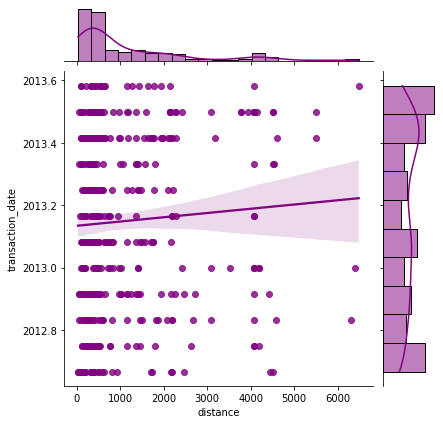

Correlation between Distance and latitude ==>  -0.5910665729874615


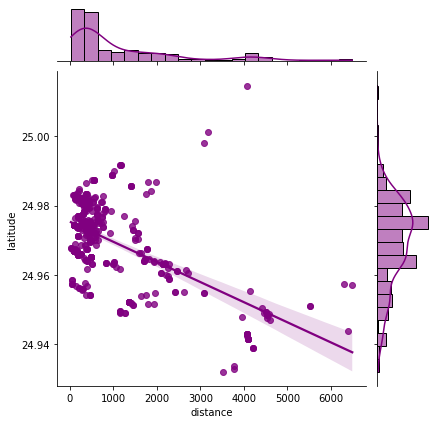

Correlation between Distance and longitude ==>  -0.8063167695693655


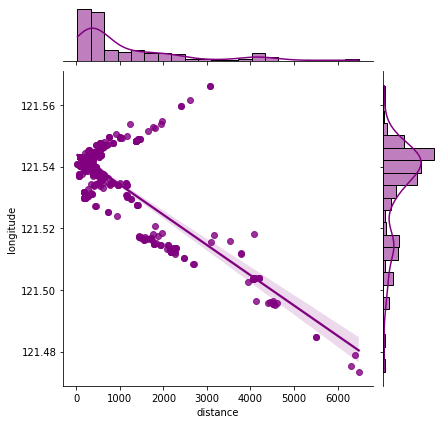

Correlation between Distance and house_price ==>  -0.6736128553689181


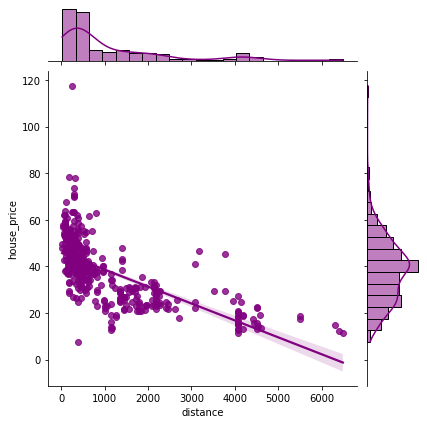

In [17]:
"""
intuitively, linear line below indicates the negative correlation of distance with other continuous variables
"""
plt.figure(dpi = 100, figsize = (5,4))
print("Distance with other continuous variables \n")
for i in  df[continuous].columns:
    if i != 'distance':
        print(f"Correlation between Distance and {i} ==> ",df[continuous].corr().loc['distance'][i])
        sns.jointplot(x='distance',y=i,data= df[continuous] ,kind = 'reg',color = 'purple')
        plt.show()

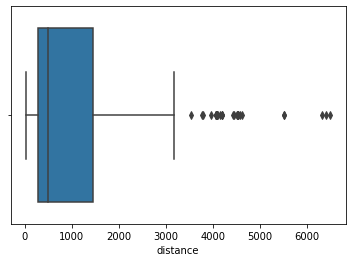

In [18]:
sns.boxplot(df["distance"])


In [20]:
"""
The outliers of distance lie in range 3000 (heavily skew at the right side)
"""

'\nThe outliers of distance lie in range 3000 (heavily skew at the right side)\n'

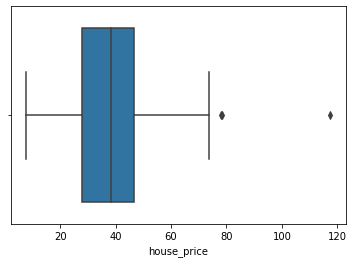

In [24]:
"""
Do similarly with other continuous variables, we have:
"""
sns.boxplot(df["house_price"])

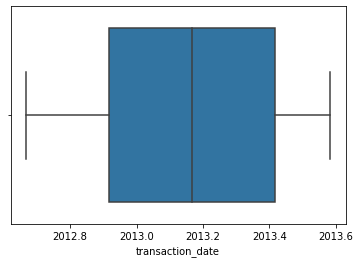

In [115]:
sns.boxplot(df["transaction_date"])

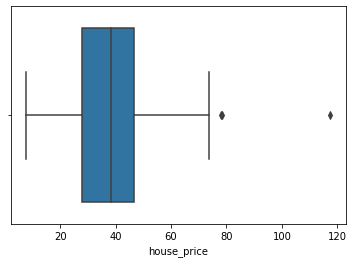

In [25]:
sns.boxplot(df["house_price"])

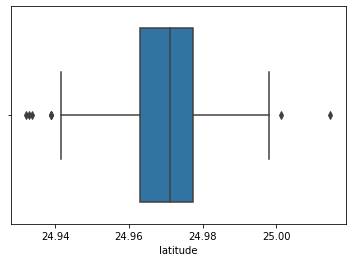

In [26]:
sns.boxplot(df["latitude"])
# frew outliers

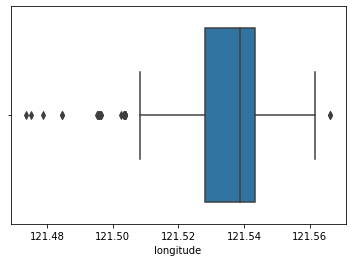

In [27]:
sns.boxplot(df["longitude"]) 
# many outliers 

In [34]:
def statistic_numbers(distribution):
    """
    return:
    sample mean
    mode
    skewness
    z-score
    """
    return np.mean(distribution), stats.mode(distribution), stats.skew(distribution), stats.zscore(distribution)

In [35]:
mean_dis, mode_dis, skew_dis, _ = statistic_numbers(df.distance)
print("mean : ", mean_dis)
print("mode : ", mode_dis)
print("skew : ", skew_dis)

mean :  1083.8856889130436
mode :  ModeResult(mode=array([289.3248]), count=array([13]))
skew :  1.8819063601148036


In [21]:
df.columns

Index(['transaction_date', 'house_age', 'distance', 'number_stores',
       'latitude', 'longitude', 'house_price', 'house_age_square'],
      dtype='object')

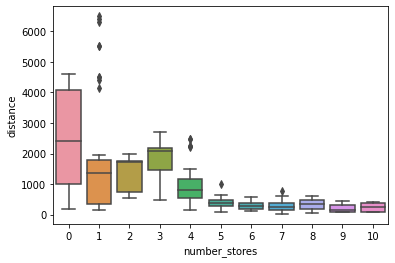

In [28]:
"""
For categorical attributes, we perform box-plot one continuous variable to each of them
For example, I will perform boxplot of number_stores 
"""
sns.boxplot(x="number_stores", y="distance", data=df)

In [39]:
df.groupby('number_stores').count()

,transaction_date,house_age,distance,latitude,longitude,house_price,house_age_square
number_stores,,,,,,,
0,67,67,67,67,67,67,67
1,46,46,46,46,46,46,46
2,24,24,24,24,24,24,24
3,46,46,46,46,46,46,46
4,31,31,31,31,31,31,31
5,67,67,67,67,67,67,67
6,37,37,37,37,37,37,37
7,31,31,31,31,31,31,31
8,30,30,30,30,30,30,30


In [42]:
df.groupby('house_age').count().head(5)
# house_age_square is the same 

,transaction_date,distance,number_stores,latitude,longitude,house_price,house_age_square
house_age,,,,,,,
0,17,17,17,17,17,17,17
1,11,11,11,11,11,11,11
2,8,8,8,8,8,8,8
3,14,14,14,14,14,14,14
4,13,13,13,13,13,13,13


In [37]:
df.describe()

,transaction_date,house_age,distance,number_stores,latitude,longitude,house_price,house_age_square
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.292271,1083.885689,4.094203,24.969030,121.533361,37.980193,427.166667
std,0.281967,11.333769,1262.109595,2.945562,0.012410,0.015347,13.606488,459.166535
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,0.000000
25%,2012.917000,9.000000,289.324800,1.000000,24.963000,121.528085,27.700000,81.000000
50%,2013.167000,16.000000,492.231300,4.000000,24.971100,121.538630,38.450000,256.000000
75%,2013.417000,28.000000,1454.279000,6.000000,24.977455,121.543305,46.600000,784.000000
max,2013.583000,43.000000,6488.021000,10.000000,25.014590,121.566270,117.500000,1849.000000


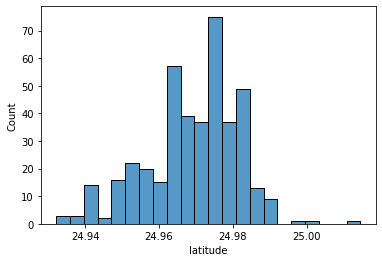

In [76]:
sns.histplot(df.latitude)

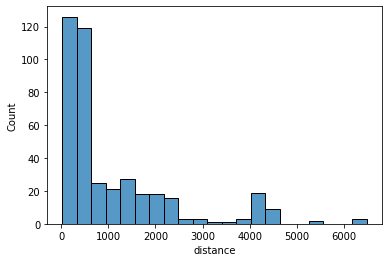

In [71]:
sns.histplot(df.distance)

In [78]:
"""
muy_latitude = 24.96
muy_distance = 1083.89

For latitude,
We can clearly see that the latitude is likely a normal distribution, and mean of it is bigger than 24.9 . Then it's obvious that the mean will be in range (24.9, 25).
Hence, I want to test if it's always that the mean is bigger than 24.9 or not

For distance, there is a imbalance between the value < 1000 and the rest. Unlike latitude, when observe on histogram of distance, it's hard to tell where the mean is supposed to lie in.
Hence, I want to test if it is bigger than a number, for example 1080
"""


"\nmuy_latitude = 24.96\nmuy_distance = 1083.89\n\nFor latitude,\nWe can clearly see that the latitude is likely a normal distribution, and mean of it is bigger than 24.9 . Then it's obvious that the mean will be in range (24.9, 25).\nHence, I want to test if it's always that the mean is bigger than 24.9 or not\n\nFor distance, there is a imbalance between the value < 1000 and the rest. Unlike latitude, when observe on histogram of distance, it's hard to tell where the mean is supposed to lie in.\nHence, I want to test if it is bigger than a number, for example 1500\n"

In [97]:
# Hypothesis testing for mean of latitude. We want to test if mean of latitude is bigger than 24 or not
"""
Null hypothesis H0: mean of latitude = 24.9
Alternative hypothesis Ha: mean of latitude > 24.9
alpha = 0.05
"""
alpha = 0.05
N = 414 
s = 0.012410
muy0 = 24.9
muy_x = 24.969030	
z_score = (muy_x - muy0) / (s/math.sqrt(N))
print(z_score)
qt = stats.t.ppf(1-alpha, N)
if abs(z_score) > qt:
  print("Reject H0. Support Ha. Hence, we have temporarily accepted alternative hypothesis, that the mean cannot be 24.9 ")
else: 
  print("Failed to reject H0. ")

113.17910686586961
Reject H0. Support Ha. Hence, we have temporarily accept alternative hypothesis, that is mean > 24.9


In [99]:
# Hypothesis testing for mean of distance
"""
Null hypothesis H0: mean of distance = 1080
Alternative hypothesis Ha: mean of distance > 1080
"""
alpha = 0.05
N = 414 
s = 1262.109595
muy0 = 1080
muy_x = 1083.885689	
z_score = (muy_x - muy0) / (s/math.sqrt(N))
print(z_score)
qt = stats.t.ppf(1-alpha, N)
if abs(z_score) > qt:
  print("Reject H0. Support Ha. Hence, we have temporarily accept alternative hypothesis")
else: 
  print("Failed to reject H0. Hence, the mean of distance can be 1080 ")


0.06264279690338559
Failed to reject H0. Hence, the mean of distance can be 1080 


In [113]:
"""
proportion of number_stores is 2 = 0.058, it's small. I want to test if proportion of it has a chance to be bigger or not. I test it with 0.12
proportion of house_age is 0.019. It's near 0.02. I  want to test if proportion of it has a chance to 0.02 or not.
"""

"\nproportion of number_stores is 2 = 0.058, it's small. I want to test if proportion of it has a chance to be bigger or not. I test it with 0.12\nproportion of house_age is 0.019. It's near 0.02. I  want to test if proportion of it has a chance to 0.02 or not.\n"

In [109]:
# Hypothesis testing for proportion of number_stores
"""
Null hypothesis H0: proportion of number_stores where number_stores is 2 = 0.12
Alternative hypothesis Ha: proportion of number_stores where number_stores is 2 != 0.12 
"""
df_test_pro = df[df['number_stores'] == 2]
alpha = 0.05
N = 414
p = len(df_test_pro) / N 
p0 = 0.12
z_score = (p - p0) / math.sqrt(p0 * (1 - p0) / N) 
print(z_score)

if z_score <= -1.645:
  print("Reject H0")
else:
  print("Failed to reject H0")

-3.8838539462273576
Reject H0


In [111]:
# Hypothesis testing for proportion of house_age
"""
Null hypothesis H0: proportion of house_age where house_age is 50 = 0.02
Alternative hypothesis Ha: proportion of house_age where house_age is 50 != 0.02
"""
df_test_pro_age = df[df['house_age'] == 10]
alpha = 0.05
N = 414
p = len(df_test_pro_age) / N
p0 = 0.02
z_score = (p - p0) / math.sqrt(p0 * (1 - p0) / N) 
print(z_score)
if z_score <= -1.645:
  print("Reject H0")
else:
  print("Failed to reject H0")

-0.09829463743659829
Failed to reject H0


In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

house_price with other continuous variables 

Correlation between house_price and transaction_date ==>  0.08749060640257195


<Figure size 500x400 with 0 Axes>

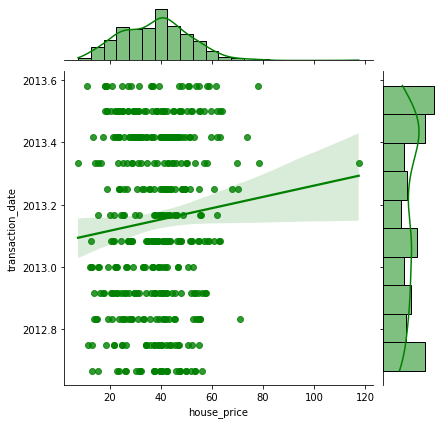

Correlation between house_price and distance ==>  -0.6736128553689181


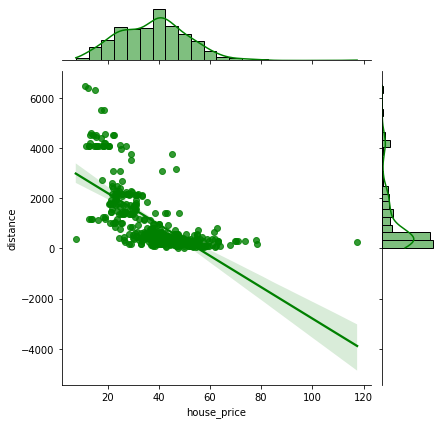

Correlation between house_price and latitude ==>  0.5463066525035899


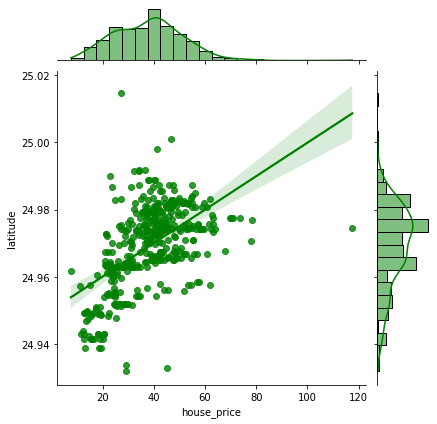

Correlation between house_price and longitude ==>  0.5232865070287729


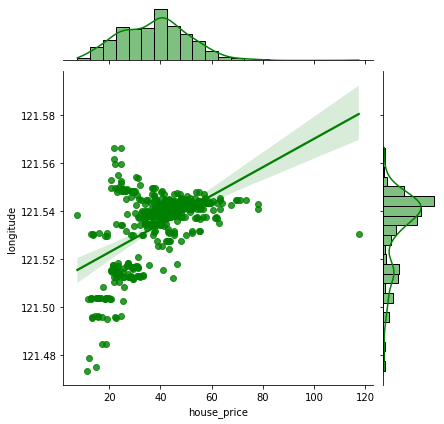

In [116]:
"""
I want to investigate the relationship between house_price and the rest and construct a linear regression model for it
We perform some charts first to see how other variables affect house_price
"""
plt.figure(dpi = 100, figsize = (5,4))
print("house_price with other continuous variables \n")
for i in  df[continuous].columns:
    if i != 'house_price':
        print(f"Correlation between house_price and {i} ==> ",df[continuous].corr().loc['house_price'][i])
        sns.jointplot(x='house_price',y=i,data= df[continuous] ,kind = 'reg',color = 'green')
        plt.show()

In [ ]:
"""
Latitude and longitude and transaction_date affects the house_price positively. That means, if they increases, house_price will increase as well. 
But distance is opposite. If it's more far away, the house_price will decrease
"""

In [53]:
predictors = ["transaction_date", "distance", "latitude", "longitude"]
df_X = df[predictors]
df_y = df["house_price"]


In [46]:
df_X = sm.add_constant(df_X)

In [48]:
model = sm.OLS(df_y, df_X).fit()
predictions = model.predict(df_X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            house_price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     102.4
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           2.41e-60
Time:                        07:15:34   Log-Likelihood:                -1524.1
No. Observations:                 414   AIC:                             3058.
Df Residuals:                     409   BIC:                             3078.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.465e+04   7391.540  

In [49]:
"""
assume that:
house_price = b0 * const + b1 * transaction_date + b2 * distance  + b3 * latitude + b4 * longitude

b1, b2, b3, b4 represents the difference in the predicted value of the response variable for each one-unit change in the predictor variable
In this problem, suppose that all the predictors are constants:
- If transaction_date increases one unit, the house_price increases in b1.
Similarly:
- If distance increases one unit, the house_price increases in b2
- If latitude increases one unit, the house_price increases in b3
- If longitude increases one unit, the house_price increases in b4

if all predictors are 0, house_price = b0 

"""

'\nassume that:\nhouse_price = b0 * const + b1 * transaction_date + b2 * distance  + b3 * latitude + b4 * longitude\n\nb1, b2, b3, b4 represents the difference in the predicted value of the response variable for each one-unit change in the predictor variable\nIn this problem, suppose that all the predictors are constants:\n- If transaction_date increases one unit, the house_price increases in b1.\nSimilarly:\n- If distance increases one unit, the house_price increases in b2\n- If latitude increases one unit, the house_price increases in b3\n- If longitude increases one unit, the house_price increases in b4\n\nif all predictors are 0, house_price = b0 \n\n'

In [58]:
# Construct 95% confidence interval
# There are 414 observations and 5 predictors, so that degree of freedom is 409
def CI(predictor = "const" ,alpha = 0.05, df = 409):
  qt = stats.t.ppf(1-alpha, df)
  print(qt)
  if predictor == "const":
    return (-1.465e+04 - qt * 7391.540, -1.465e+04 + qt * 7391.540)
  elif (predictor == "transaction_date"):
    return (5.4981 - qt * 1.697, 5.4981 + qt * 1.697 )
  elif (predictor == "distance"):
    return  (-0.0062 - qt * 0.001, -0.0062 + qt * 0.001 )
  elif (predictor == "latitude"):
    return  ( 233.8133 - qt * 48.134, 233.8133 + qt * 48.134 )
  elif (predictor == "longitude"):
    return  (-18.2321  - qt * 52.877 , -18.2321  + qt * 52.877 )
  



In [63]:
print("95% confidence interval of {}".format("intercept"))
print(CI(predictor = "const", alpha=0.05, df=409 ))
print("\n")
for value in predictors:
  print("95% confidence interval of {}".format(value))
  print(CI(predictor = value, alpha=0.05, df=409 ))
  print("\n")

95% confidence interval of intercept
1.6485877281964472
(-26835.602136473168, -2464.397863526832)


95% confidence interval of transaction_date
1.6485877281964472
(2.700446625250629, 8.29575337474937)


95% confidence interval of distance
1.6485877281964472
(-0.007848587728196446, -0.004551412271803553)


95% confidence interval of latitude
1.6485877281964472
(154.4601782909922, 313.1664217090078)


95% confidence interval of longitude
1.6485877281964472
(-105.40447330384355, 68.94027330384354)


